In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import seaborn as sns

# Note that the UM output 'Total aerosol H2SO4 load (kgm-2)' is in units of kg S per m2 
# background sulfate burden in UKESM1 is ~ 0.7 Tg (as in Mulcahy et al., 2020, see their Table 4)
# https://gmd.copernicus.org/articles/13/6383/2020/

In [4]:
#### read in the forcing variability decomp df, made seperately, and emulate these:
df_fv_full = pd.read_csv('Intermediate_outputs/Forcing_variability_decomp.csv').rename(columns={'Run':'Run_ID'})

# drop the seasonal runs
seasonal_runs = ['u-df848', 'u-df859', 'u-df931', 'u-df932', 
                 'u-dg051', 'u-dg331', 'u-dg381']
df = df_fv_full[~df_fv_full['Run_ID'].isin(seasonal_runs)]

areacella = xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/fx/areacella/gn/latest/areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc')
total_area = areacella.areacella.sum(['lat', 'lon']).values.item()
df['Burden_anom_Tg_S'] = df['Burden']*total_area/1E9  #10^9 converts from kg to Tg

injected_S_Tg = 12*(32.065/(32.065+2*15.999)) # convert from SO2 to S
df['Lifetime'] = df['Burden_anom_Tg_S']/injected_S_Tg ## lifetime (years) = burden (kg)/injection rate (kg per year)

/tmp/ipykernel_1479/1954613662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Burden_anom_Tg_S'] = df['Burden']*total_area/1E9  #10^9 converts from kg to Tg
/tmp/ipykernel_1479/1954613662.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lifetime'] = df['Burden_anom_Tg_S']/injected_S_Tg ## lifetime (years) = burden (kg)/injection rate (kg per year)


In [6]:
run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2]
            }

df['Injection_altitude'] = [x[1] for x in df['Run_ID'].map(run_dict)]
df['Injection_latitude'] = [x[0] for x in df['Run_ID'].map(run_dict)]

/tmp/ipykernel_1479/1415967270.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Injection_altitude'] = [x[1] for x in df['Run_ID'].map(run_dict)]
/tmp/ipykernel_1479/1415967270.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Injection_latitude'] = [x[0] for x in df['Run_ID'].map(run_dict)]


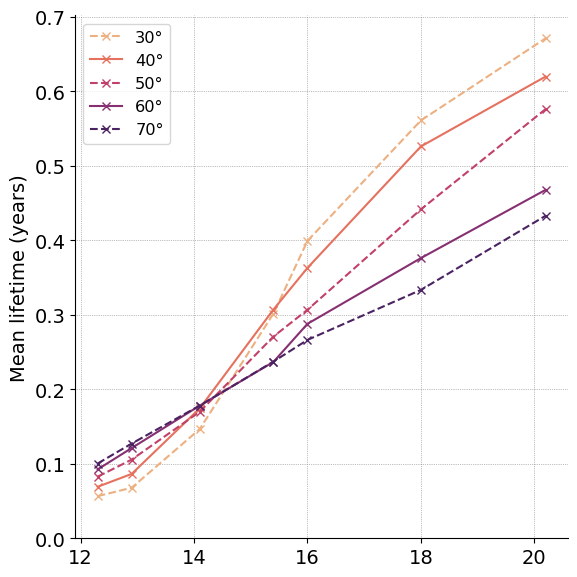

In [8]:

matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 6))

xvars = ['Injection_altitude']
yvars = ['Lifetime']

xlabels = ['Injection altitude (km)']
ylabels = ['Mean lifetime (years)']
titles = ['']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(df['Injection_latitude'].unique())))
i=0
j=0
for injection_lat in df['Injection_latitude'].unique():
    df_to_plot = df[df['Injection_latitude']==injection_lat]
    ax.plot(df_to_plot[xvars[i]], df_to_plot[yvars[i]],
            label=str(str(injection_lat).split('.')[0]+'°'), 
            marker='x', c=palette[j], ls=linestyles[j])
    j=j+1
if i >1:
    ax.set_xlabel(xlabels[i])
if i == 0 or i == 2:
    ax.set_ylabel(ylabels[i])
ax.spines[['right', 'top']].set_visible(False)
ax.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)
ax.set_ylim(0,)
ax.set_title(titles[i])
i=i+1
ax.legend(fontsize='small')
plt.tight_layout()
#plt.savefig('Figures/Scatters/Delta_AOD_global_alt_only.jpg', dpi=350, bbox_inches='tight')

In [9]:
## also get 60NS13kmspringsummer 

df_ss = df_fv_full[df_fv_full['Run_ID']=='u-dg331']
df_ss['Burden_anom_Tg_S'] = df_ss['Burden']*total_area/1E9  #10^9 converts from kg to Tg
df_ss['Lifetime'] = df_ss['Burden_anom_Tg_S']/injected_S_Tg ## lifetime (years) = burden (kg)/injection rate (kg per year)

/tmp/ipykernel_1479/3799201316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss['Burden_anom_Tg_S'] = df_ss['Burden']*total_area/1E9  #10^9 converts from kg to Tg
/tmp/ipykernel_1479/3799201316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ss['Lifetime'] = df_ss['Burden_anom_Tg_S']/injected_S_Tg ## lifetime (years) = burden (kg)/injection rate (kg per year)


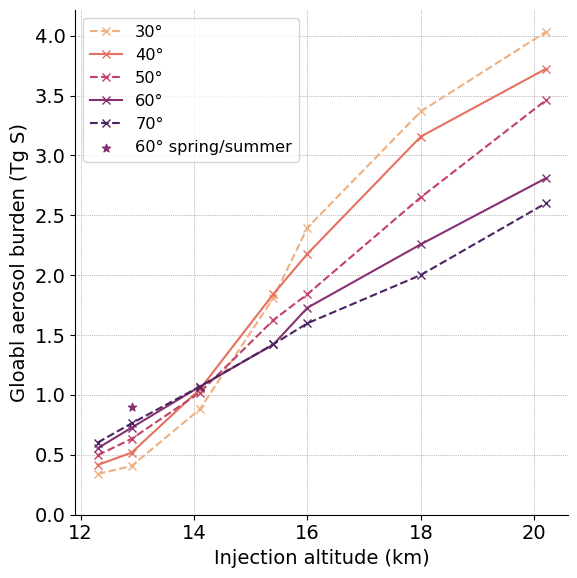

In [14]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 6))

xvars = ['Injection_altitude']
yvars = ['Burden_anom_Tg_S']

xlabels = ['Injection altitude (km)']
ylabels = ['Gloabl aerosol burden (Tg S)']
titles = ['']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(df['Injection_latitude'].unique())))
i=0
j=0
for injection_lat in df['Injection_latitude'].unique():
    df_to_plot = df[df['Injection_latitude']==injection_lat]
    ax.plot(df_to_plot[xvars[i]], df_to_plot[yvars[i]],
            label=str(str(injection_lat).split('.')[0]+'°'), 
            marker='x', c=palette[j], ls=linestyles[j])
    j=j+1
if i >1:
    ax.set_xlabel(xlabels[i])
if i == 0 or i == 2:
    ax.set_ylabel(ylabels[i])

## add spring/summer 13km 60NS:

ax.scatter(12.9, df_ss['Burden_anom_Tg_S'].item(), marker='*', color=palette[3], label='60° spring/summer')

ax.spines[['right', 'top']].set_visible(False)
ax.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)
ax.set_ylim(0,)
ax.set_xlabel('Injection altitude (km)')
ax.set_title(titles[i])
i=i+1
ax.legend(fontsize='small')
plt.tight_layout()
#plt.savefig('Figures/Scatters/Burdens.jpg', dpi=350, bbox_inches='tight')

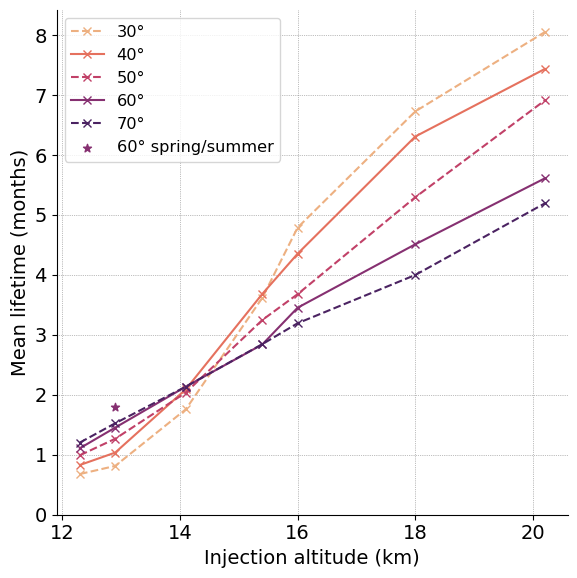

In [12]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(6, 6))

xvars = ['Injection_altitude']
yvars = ['Lifetime']

xlabels = ['Injection altitude (km)']
ylabels = ['Mean lifetime (months)']
titles = ['']
linestyles = ['--', 'solid', '--', 'solid', '--', 'solid']
cmap = sns.color_palette("flare", as_cmap=True)

palette = cmap(np.linspace(0, 1, len(df['Injection_latitude'].unique())))
i=0
j=0
for injection_lat in df['Injection_latitude'].unique():
    df_to_plot = df[df['Injection_latitude']==injection_lat]
    ax.plot(df_to_plot[xvars[i]], 12*df_to_plot[yvars[i]],
            label=str(str(injection_lat).split('.')[0]+'°'), 
            marker='x', c=palette[j], ls=linestyles[j])
    j=j+1
if i >1:
    ax.set_xlabel(xlabels[i])
if i == 0 or i == 2:
    ax.set_ylabel(ylabels[i])

## add spring/summer 13km 60NS:

ax.scatter(12.9, 12*df_ss['Lifetime'].item(), marker='*', color=palette[3], label='60° spring/summer')

ax.spines[['right', 'top']].set_visible(False)
ax.grid(color = 'gray', linestyle = 'dotted', linewidth = 0.5)
ax.set_ylim(0,)
ax.set_xlabel('Injection altitude (km)')
ax.set_title(titles[i])
i=i+1
ax.legend(fontsize='small')
plt.tight_layout()
plt.savefig('Figures/Supp/Lifetimes.jpg', dpi=350, bbox_inches='tight')